# Key concepts & understanding

## Threads, processes & tasks

- **Thread**: Smallest unit of processing. Basic unit of CPU Utilization, consisting of a program counter, a stack and a set of registers/ They can be used in the same Process space. 
- **Process** : Is an instance of a program that is being executed and loaded in memory. A process can me made of multiple threads. Processes are independent from each other.
- **Task** : Is a set of program instructions loaded in memory.


Process and threads are related but otherwise orthogonal concepts. A thread is what the CPU actually runs; it's about scheduling access to shared resources (e.g. the CPU).<br>
A process is the allocated memory for instructions and data (a process needs memory for code and data). Of course a process will need one or more threads b/c that is what is actually run by the CPU.<br>
Multiple threads just means that the process gets more time slices on the same CPU or get to run on more CPUs concurrently.<br>
Think of a thread as a slice of time and a process as a slice of space (a region of memory in this case).


## Concurency

Managing multiple tasks from multiple sources, related or not, at the same time.<br>
These tasks might not be compulsory to execute at the exact same moment but they might interleaved or executed in overlapping periods of time.<br>
The main goal of concurrency is to handle multiple user inputs, manage several I/O tasks, or process multiple independent tasks.


## Parallelism 

Parallelism is a subset of concurrency where tasks and processes are executed simultaneously in parallel :
- **Thread-based** : Managing I/O-bound processes independently in a multi-threading way. Multiple threads from a same process are executed simultaneously and each owns their own data coming from shared memory of the process. Limited by the CPU shared-memory.
- **Processed-based** : Managing CPU-bound processes in a multi-processing way. Each core of the CPU can manage a process independently. Not limited by the CPU shared-memory.
- **Coroutine-based** : Managing I/O-bound processes in asynchronous fashion with the ability to pause & await the resource availability to run the task. (e.g. often rely on external ressources as network data)



## Sync & Async comparison

### Sync : 
Tasks are assigned Sequentially (also known as blocking). Tasks are executed in a predetermined order and each new one waits the ending of the previous one. Better use with **heavy tasks, which are more CPU-bound task where the execution are limited by CPU/GPU power** as in Machine Learning workflows and relying on big memory consumption where execution time is heavier than await time. In this case, prefer use multithreading or multiprocessing to speed up computation in parallelism.


### Async : 
Tasks can be executed concurrently and independtly of each other without blocking the execution of following tasks of the program. Don't need the use of multithreading module to execute multiple tasks at the same time because it's based on a loop of events to manage tasks. Tasks can start and being suspended being "non blocking" to start another async task. Asyncio module manages the scheduling of tasks awaiting without "crashes". Better you reveice much more **lightweighted tasks, which are not limited by CPU/GPU power, but more I/O bound tasks (storage acces, requests delays, ping, huge amount of tasks received by a generator, etc...),** and can take some to time to receive the answer, as in database requests, where await time is heavier than execution time if tasks where executed sequentially. <br>
async can't take for/while loop in code.

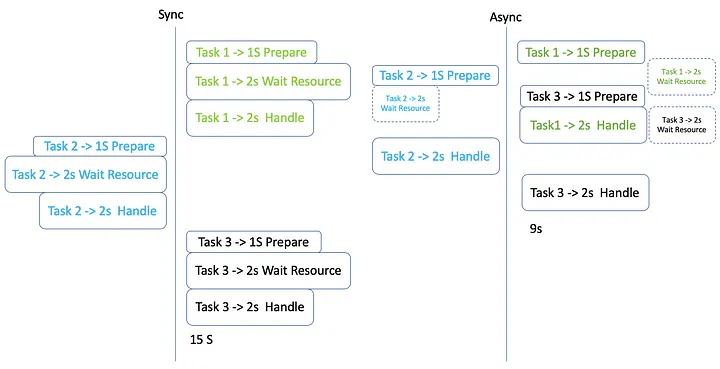

## Python async series API

### Python keyworks used to manage concurrency and async
- yield : Renvoie une valeur et suspends son état jusqu'à recevoir le prochain input du générateur
- async : declare a function as asynchronous, which can be suspended.
- await : can suspend a coroutine waiting than another one is finished to take over

### Asyncio
- Run -> execute coroutine
- Create_task
- Sleep
- Gather -> Run all awaitable objects
- Shield -> make awaitable objects cancallable
- Wait_for -> wait for an awaitable within a timeout
- Wait -> don’t throw timeout exception, but will return the Future object
- Run_coroutine_threadsafe -> Submit a coroutine to the given event loop
- Current_tasks
- All_tasks
- Iscoroutine
- Iscoroutinefunction

# Concurrency in code

## Thread-based

In [3]:
import threading
import time
# Function to simulate a time-consuming task
def print_numbers():
    for i in range(1, 6):
        print(f"Printing number {i}")
        time.sleep(1)  # Simulate a delay of 1 second
# Function to simulate another task
def print_letters():
    for letter in 'Geeks':
        print(f'Printing letter {letter}')
        time.sleep(1)  # Simulate a delay of 1 second
# Create two thread objects, one for each function
thread1 = threading.Thread(target=print_numbers)
thread2 = threading.Thread(target=print_letters)

# Start the threads
thread1.start()
thread2.start()

# The main thread waits for both threads to finish
thread1.join()
thread2.join()

print('Both threads have finished')


Printing number 1
Printing letter G
Printing number 2
Printing letter e
Printing number 3
Printing letter e
Printing number 4
Printing letter k
Printing number 5
Printing letter s
Both threads have finished


## Process-Based

In [5]:
import multiprocessing
# Function to square a number
def square(x):
    return x * x
if __name__ == "__main__":
    # Define a list of numbers
    numbers = [1, 2, 3, 4, 5]

    # Create a multiprocessing pool
    with multiprocessing.Pool() as pool:
        # Use the map method to apply the 'square ' function to each number in parallel
        results = pool.map(square, numbers)
    # Print the results
    print(results)


[1, 4, 9, 16, 25]


## Coroutine-Based Concurrency (using asyncio)

In [7]:
# For asynchronous programming
import asyncio
import time
# Simulate a async func with name as arg with a 1 sec delay
async def greet(name):
    await asyncio.sleep(1)
    print(name, time.time() - start_time)
# Define async main func
async def main():
    await asyncio.gather(greet("Geeks"), greet("For"), greet("Geeks")) # Schedule the greet function for each name concurrently with asyncio.gather()
    print("End of main", time.time() - start_time)
    print("if tasks were to be executed sequentially, time would be 3 sec.")
# If in a Jupyter notebook or IPython environment:
import nest_asyncio
nest_asyncio.apply()
if __name__ == "__main__":
    start_time = time.time()
    asyncio.create_task(main())
    exec_time = time.time() - start_time
    print("This message is printed before waiting the end of the task execution", exec_time)


This message is printed before waiting the end of the task execution 2.002716064453125e-05


Geeks 1.0042402744293213
For 1.0043702125549316
Geeks 1.004394769668579
End of main 1.0044610500335693
if tasks were to be executed sequentially, time would be 3 sec.


## SYNC VS ASYNC

In [10]:
# SYNC FASHION WAY
import time
import datetime
import requests
 
def task_5():
  time.sleep(5)
 
def test_time():
  task_5()
  task_5()
  task_5()
 
if __name__ == '__main__':
  print(f'begin - { datetime.datetime.now()}')
  test_time()
  print(f'end   - { datetime.datetime.now()}')

begin - 2025-02-11 10:51:27.652739
end   - 2025-02-11 10:51:42.653094


In [11]:
# ASYNC FASHION WAY
import time
import datetime
import asyncio
 
async def task_5():
  await asyncio.sleep(5)
 
async def task_time():
  await asyncio.gather(
    task_5(),
    task_5(),
    task_5()
  )
 
if __name__ == '__main__':
  print(f'begin - { datetime.datetime.now()}')
  asyncio.run( task_time() )
  print(f'end   - { datetime.datetime.now()}')

begin - 2025-02-11 10:51:48.886974
end   - 2025-02-11 10:51:53.891561


In [12]:
import time
import datetime
import requests
 
def task_req():
  print(requests.get("https://www.sina.com"))
 
def test_req():
  for i in range(20):
    task_req()
 
if __name__ == '__main__':
  print(f'begin - { datetime.datetime.now()}')
  # test_time()
  test_req()
  print(f'end   - { datetime.datetime.now()}')

begin - 2025-02-11 10:55:14.429195
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
end   - 2025-02-11 10:55:16.261616


In [13]:
import time
import datetime
import asyncio
import httpx

async def task_req(client: httpx.Client):
  res = await client.get( "https://www.sina.com" )
  print (res)

async def test_req():
  client:httpx.Client = httpx.AsyncClient()
  tasks = []
  for i in range(20):
    tasks.append( task_req(client) )
  await asyncio.gather( *tasks )

if __name__ == '__main__':
  print(f'begin - { datetime.datetime.now()}')
  asyncio.run( test_req() )
  print(f'end   - { datetime.datetime.now()}')

begin - 2025-02-11 10:55:31.100670
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
<Response [200 OK]>
end   - 2025-02-11 10:55:32.038340
